# Name: 陳昱丞
# Student ID: 0716206

import

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 15 13:59:40 2020

@author: user
"""

import pandas
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
#from sklearn.naive_bayes import CategoricalNB
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
import scipy.stats

1.	Data input: 將mushroom和iris下載下來轉成csv檔，並用pandas套件中的read_csv讀檔並轉成dataframe型式。

In [2]:
#1: data input
mushroom = pandas.read_csv("mushroom.csv",header=None)
iris = pandas.read_csv("iris.csv",header=None)

2.	Data Visualization: 將資料統計之後畫成圖表。 1. Mushroom要先顯示value frequency of every feature，用for讀取每個column，再呼叫函式draw_freq。Draw_freq中使用一個dictionary去存每個feature出現的次數。之後再用x_axis, y_axis兩個list分別存key和value，最後再用plt (matplotlib.pyplot)畫成直方圖。2. Iris 要算平均數、標準差、和value frequency (需binning)。用同樣的方式存取col並傳入函式，在函式cnt中，用statistics套件中的mean和stdev分別算出平均數和標準差，再用pandas中的qcut做binning，最後一樣plt出直方圖。3. 兩筆資料都先用label來分，再分別作和剛剛一樣的事。呼叫draw_lab和draw_lab_iris分別處理mushroom和iris。draw_lab基本上都跟上面一樣作法，只是用了兩個dict來存(e,p)。draw_lab_iris用了三個list (setosa, versicolor, virginica)，之後再分別呼叫上面出現過的cnt函式。

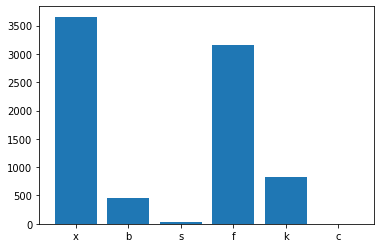

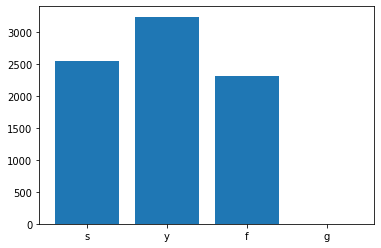

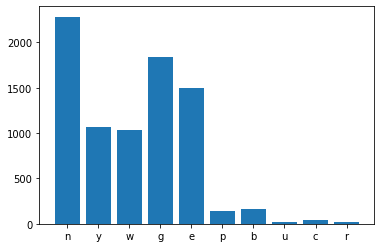

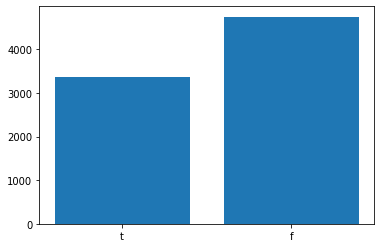

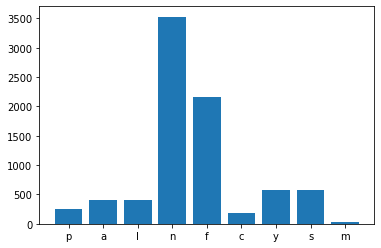

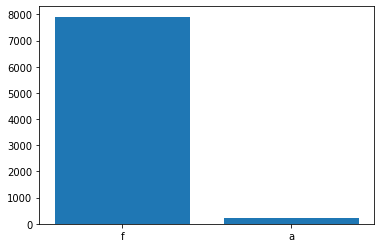

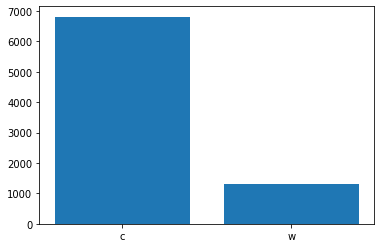

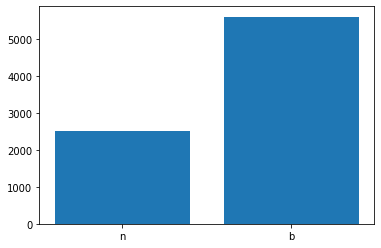

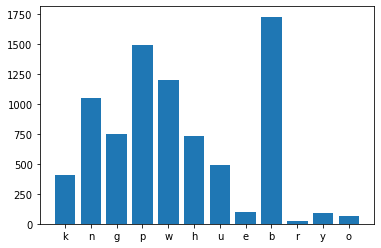

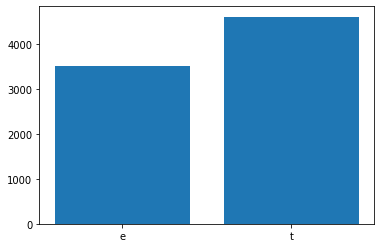

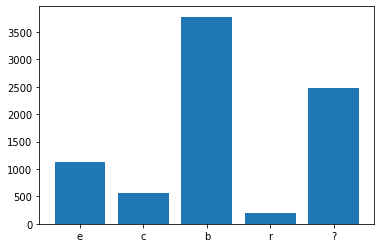

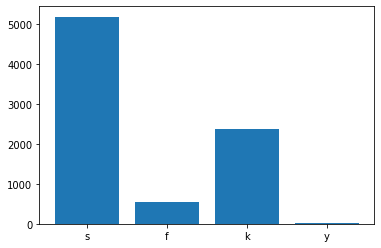

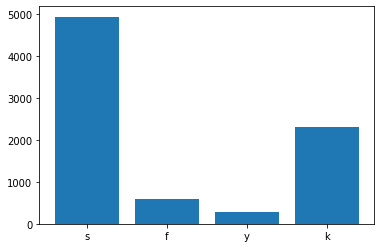

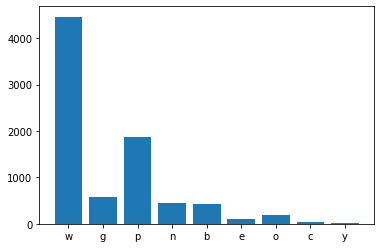

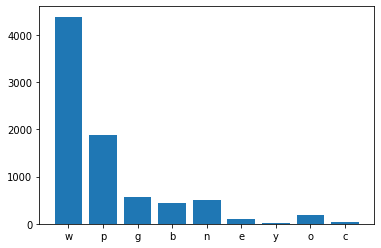

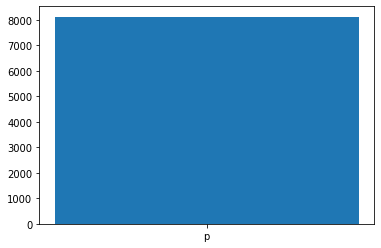

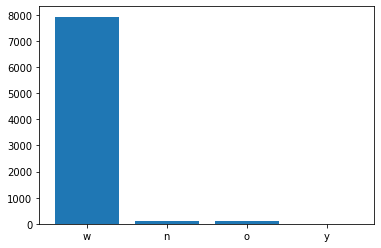

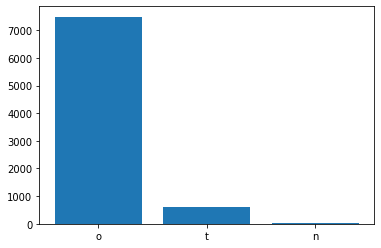

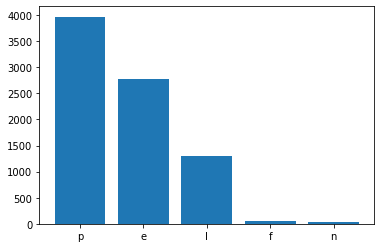

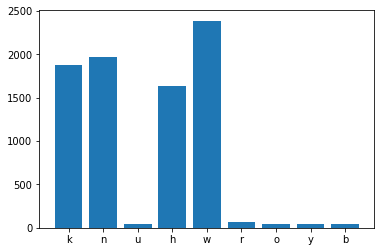

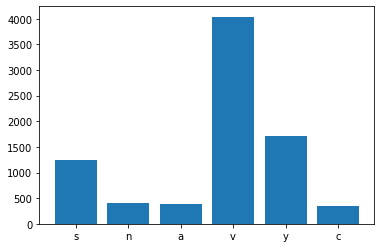

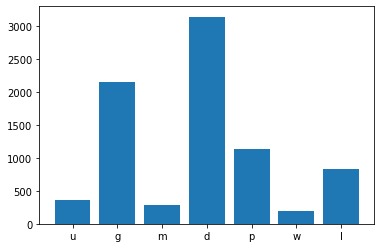



mean: 5.843333333333334
std: 0.8280661279778629


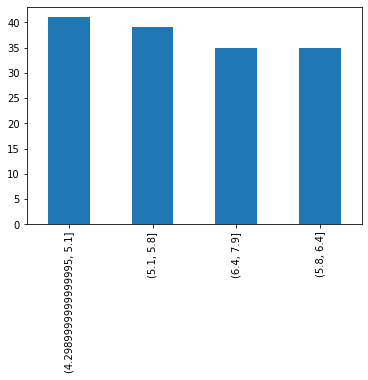

mean: 3.054
std: 0.43359431136217363


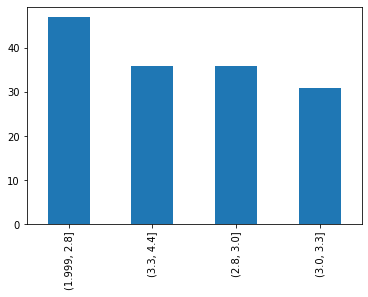

mean: 3.7586666666666666
std: 1.7644204199522626


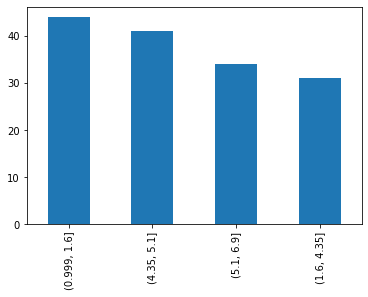

mean: 1.1986666666666668
std: 0.7631607417008411


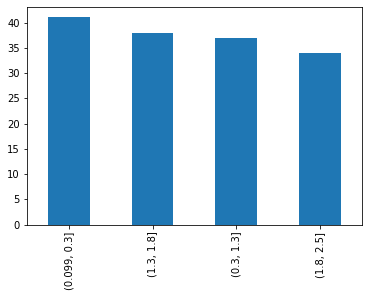



e:


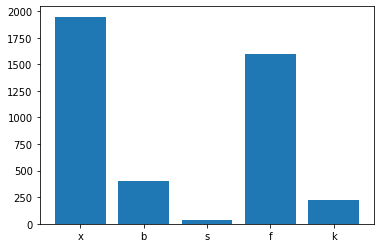

p:


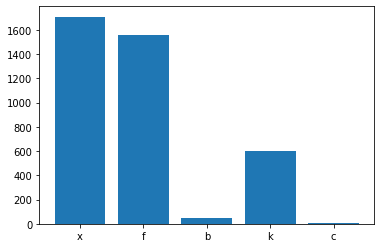

e:


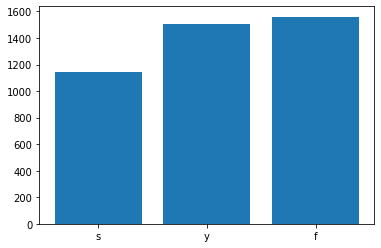

p:


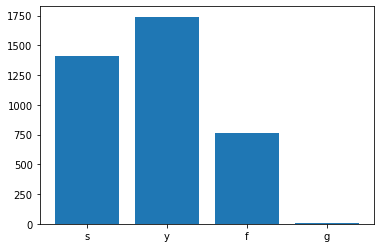

e:


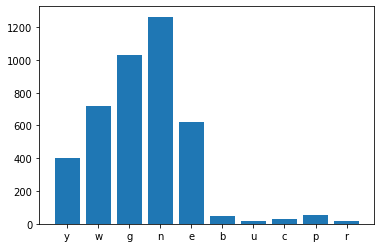

p:


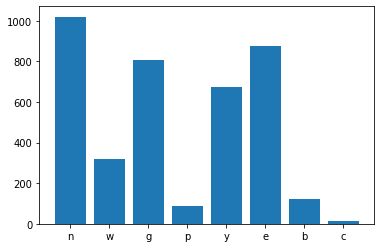

e:


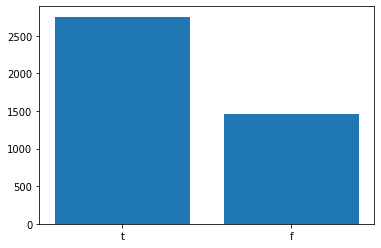

p:


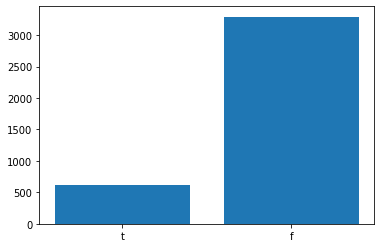

e:


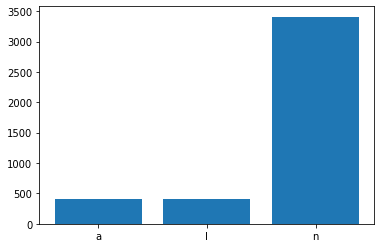

p:


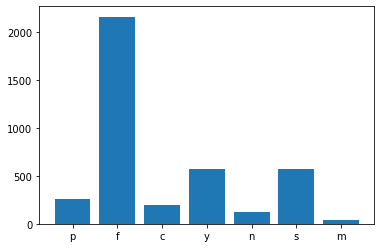

e:


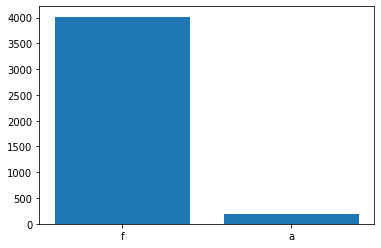

p:


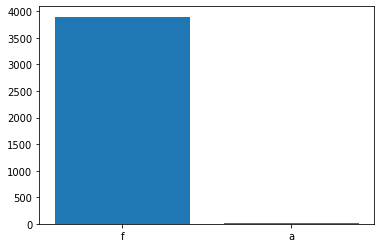

e:


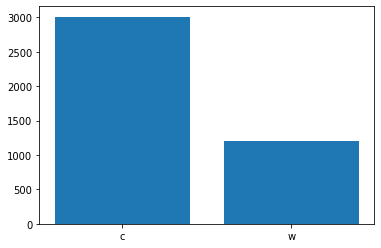

p:


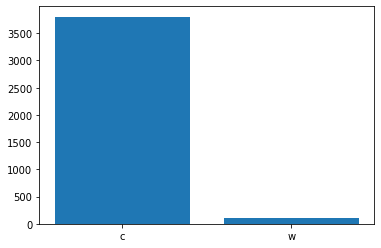

e:


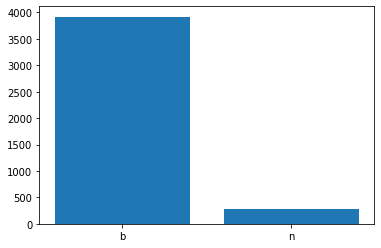

p:


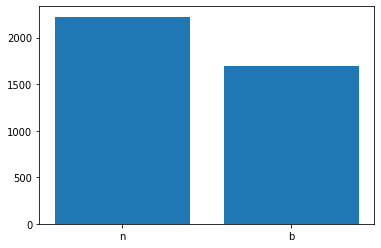

e:


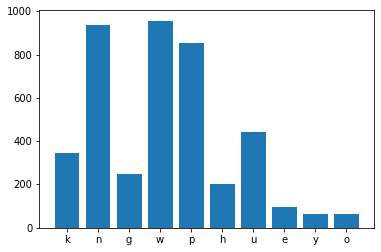

p:


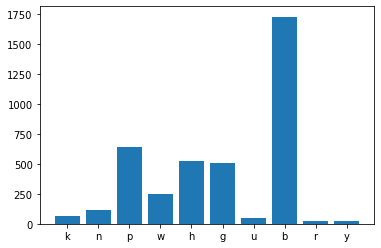

e:


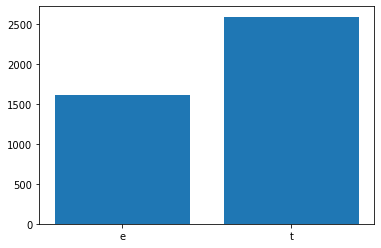

p:


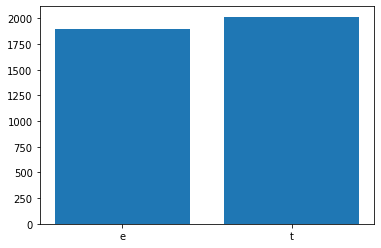

e:


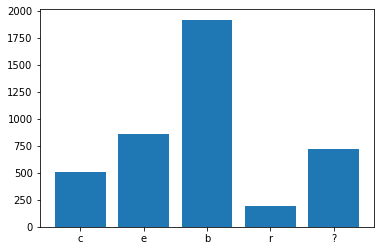

p:


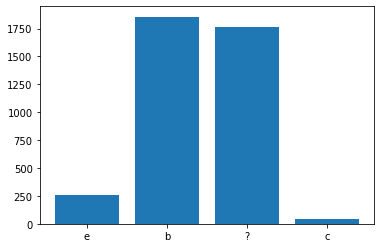

e:


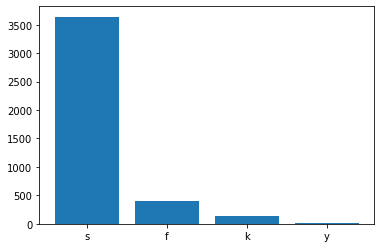

p:


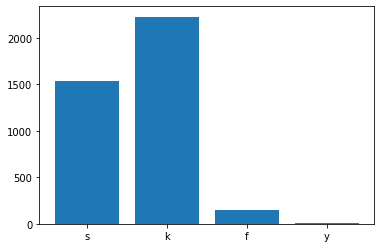

e:


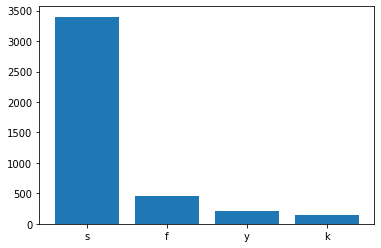

p:


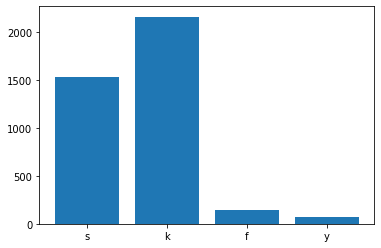

e:


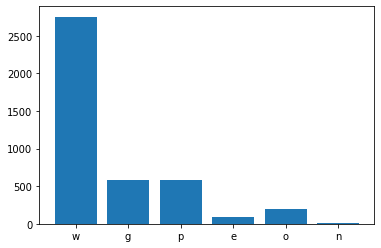

p:


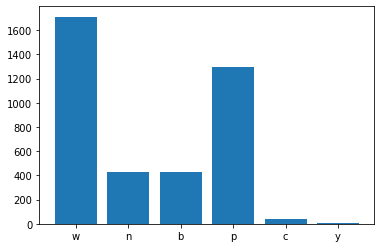

e:


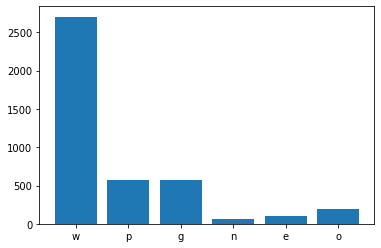

p:


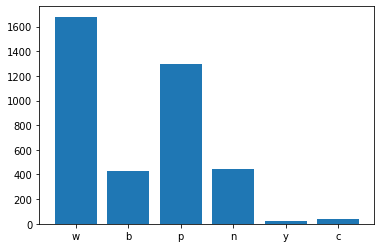

e:


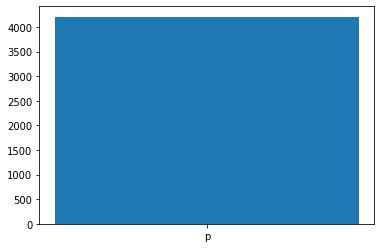

p:


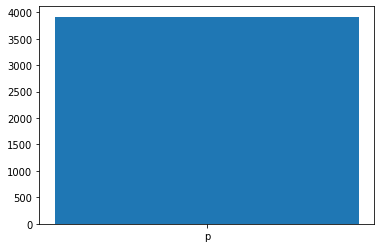

e:


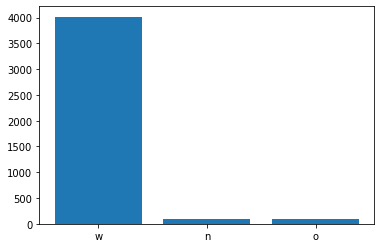

p:


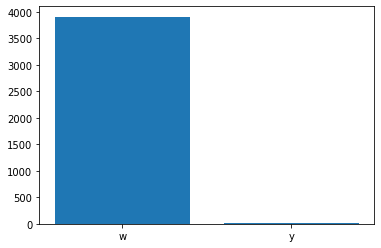

e:


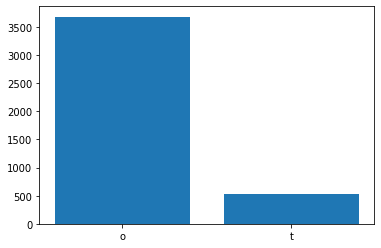

p:


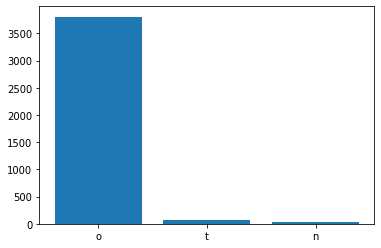

e:


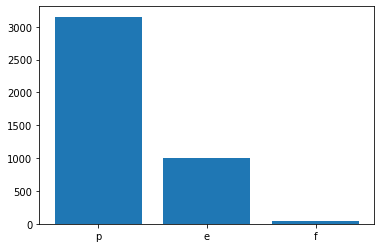

p:


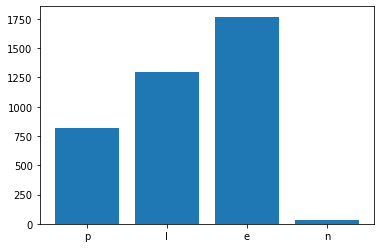

e:


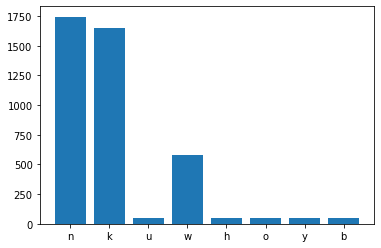

p:


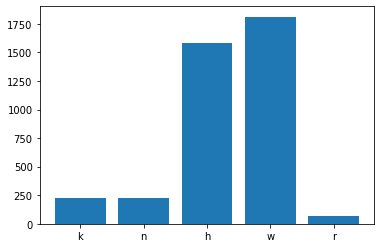

e:


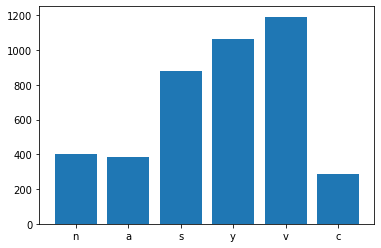

p:


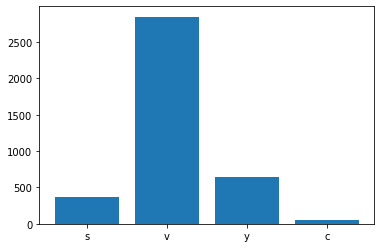

e:


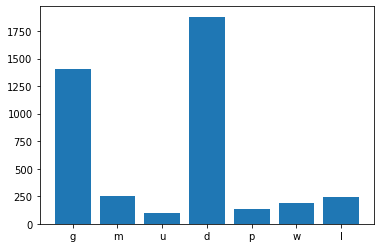

p:


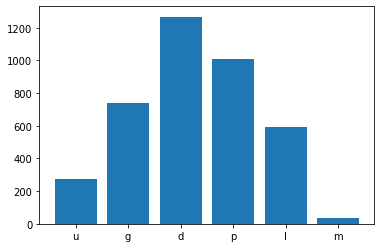

Iris-setosa:
mean: 5.006
std: 0.3524896872134513


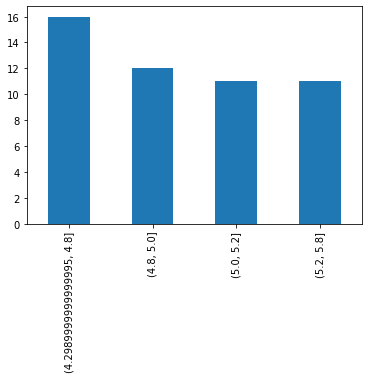

Iris-versicolor:
mean: 5.936
std: 0.5161711470638634


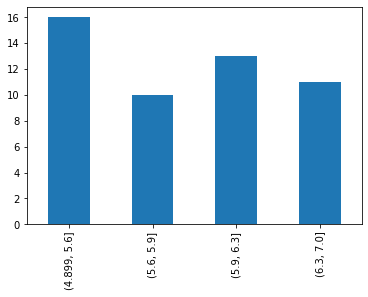

Iris-virginica:
mean: 6.588
std: 0.6358795932744321


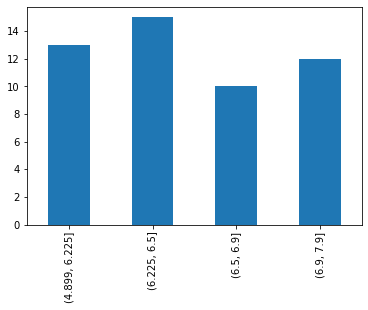

Iris-setosa:
mean: 3.418
std: 0.38102439795469095


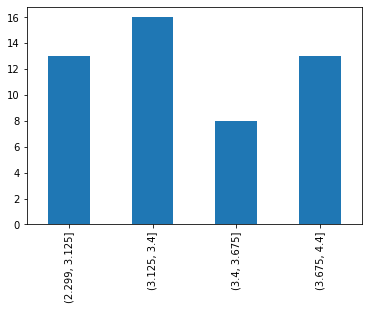

Iris-versicolor:
mean: 2.77
std: 0.3137983233784114


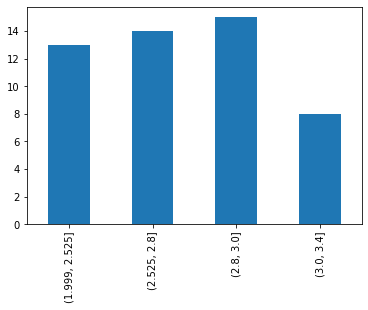

Iris-virginica:
mean: 2.974
std: 0.32249663817263746


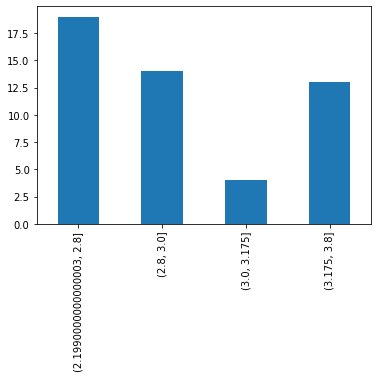

Iris-setosa:
mean: 1.464
std: 0.17351115943644546


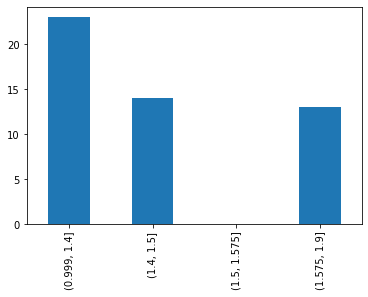

Iris-versicolor:
mean: 4.26
std: 0.46991097723995795


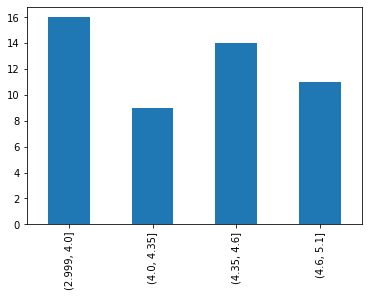

Iris-virginica:
mean: 5.552
std: 0.5518946956639834


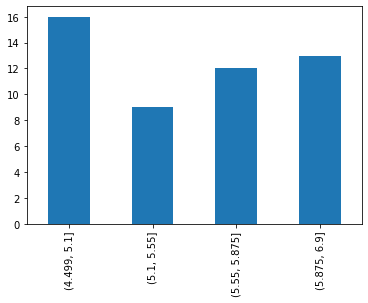

Iris-setosa:
mean: 0.244
std: 0.10720950308167838


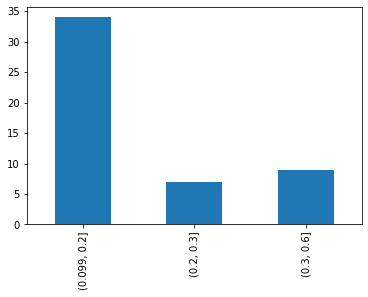

Iris-versicolor:
mean: 1.326
std: 0.19775268000454405


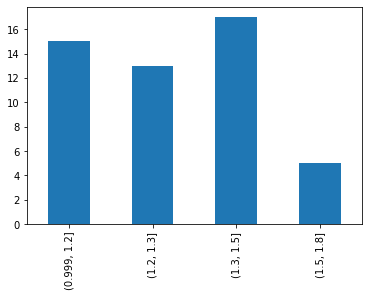

Iris-virginica:
mean: 2.026
std: 0.27465005563666733


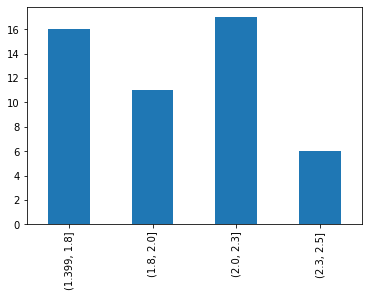

In [3]:
def draw_freq(data_in):
    s = {}
    for d in data_in:
        if d in s.keys():
            s[d]+=1
        else:
            s[d]=1
    
    x_axis=[]
    y_axis=[]
    for x in s.keys():
        x_axis.append(x)
    for y in s.values():
        y_axis.append(y)
    plt.bar(x_axis,y_axis)
    plt.show()
    
    
def cnt(data_in):
    s1=stat.mean(data_in)
    s2=stat.stdev(data_in)
    print('mean: '+str(s1))
    print('std: '+str(s2))
    binning=pandas.qcut(data_in,q=4,duplicates="drop").value_counts()
    binning.plot.bar()
    plt.show()
    
def draw_lab(data_in):
    for col in range(1,23):
        e = {}
        p = {}
        lab = data_in.iloc[:,0]
        c = data_in.iloc[:,col]
        for i,j in zip(lab,c):
            if i == 'e':
                if j in e.keys():
                    e[j]+=1
                else:
                    e[j]=1
            else:
                if j in p.keys():
                    p[j]+=1
                else:
                    p[j]=1
        print("e:")
        e_x_axis=[]
        e_y_axis=[]
        for x in e.keys():
            e_x_axis.append(x)
        for y in e.values():
            e_y_axis.append(y)
        plt.bar(e_x_axis,e_y_axis)
        plt.show()
        print("p:")
        p_x_axis=[]
        p_y_axis=[]
        for x in p.keys():
            p_x_axis.append(x)
        for y in p.values():
            p_y_axis.append(y)
        plt.bar(p_x_axis,p_y_axis)
        plt.show()
 
def draw_lab_iris(data_in):
    for col in range(4):
        setosa = []
        versicolor = []
        virginica = []
        lab = data_in.iloc[:,4]
        c = data_in.iloc[:,col]
        for i,j in zip(lab,c):
            if i == 'Iris-setosa':
                setosa.append(j)
            elif i == 'Iris-versicolor':
                versicolor.append(j)
            else:
                virginica.append(j)
        
        print("Iris-setosa:")
        cnt(setosa)
        print("Iris-versicolor:")
        cnt(versicolor)
        print("Iris-virginica:")
        cnt(virginica)
        
#2.1:
for col in range(1,23):
    draw_freq(mushroom.iloc[:,col])
print("\n")
#2.2:
for col in range(4):
    cnt(iris.iloc[:,col])
print("\n")
#2.3:
draw_lab(mushroom)
draw_lab_iris(iris)

3.	Data Preprocessing: 1. Mushroom的第11個feature有出現問號，也就是missing value，直接用del把它刪掉。2. 將data format轉成可以丟進model的型式，也就是numpy中的np.array。對mushroom來說，可以先呼叫fit_transform()找到資料的規則並將它標準化，再將它們丟進np.array()。但因為第11欄已被刪除，因此需跳過。對iris來說，直接用np.array()來轉，並分別賦予三個種類數字(0,1,2)。最後再對兩筆資料傳進shuffle函式進行shuffle。

In [4]:
#3.1: drop the missing value
del mushroom[11]
        
#3.2:
#mushroom
label_en=LabelEncoder()
for i in range(1,11):
    mushroom[i]=label_en.fit_transform(mushroom[i])
for i in range(12,23):
    mushroom[i]=label_en.fit_transform(mushroom[i])
mushroom[0]=label_en.fit_transform(mushroom[0])
mush_x=np.array(mushroom.iloc[:,1:23])
mush_y=np.array(mushroom[0])

#iris
x = np.array(iris.iloc[:,0:4])
y = np.array(iris.iloc[:,4])

for i in range(len(y)):
    if y[i]=='Iris-setosa':
        y[i]=0
    elif y[i]=='Iris-versicolor':
        y[i]=1
    else:
        y[i]=2
y = np.array(y,dtype="int64")

#3.3: shuffle
mush_x,mush_y=shuffle(mush_x,mush_y)
x,y=shuffle(x,y)

4.	Train-Test-Split: 直接呼叫函式進行處理。因為原第四點的model construction會用到，因此先將4,5點對調。

In [5]:
#5: split
MX_train,MX_test,My_train,My_test=model_selection.train_test_split(mush_x,mush_y,test_size=0.3)
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)

5,6.  Model Construction, Results: 依照題目指示呼叫對應函式。這裡我使用python的scikit-learn套件(sklearn)。對mushroom來說，使用MultinomialNB()來construct model，而alpha為Laplace Smoothing係數。此係數不得為0，因此without laplace就令alpha為一個很接近0的數。另外with laplace就令alpha為1.0即可。
對iris來說，使用GaussianNB()來construct model。所有輸出結果皆如code下方所示。

In [6]:
#4,6:
# mushroom: use MultinomialNB

# without laplace
print("Mushroom MultinomialNB without Laplace:")
mushroom_withoutLaplace = MultinomialNB(alpha=1.0e-10)
mushroom_withoutLaplace.fit(MX_train, My_train)
result = mushroom_withoutLaplace.predict(MX_test)
print("Without Laplace Confusion matrix:")
print(confusion_matrix(My_test, result))
print("Without Laplace Accuracy:")
print('Without Laplace Train:', mushroom_withoutLaplace.score(MX_train, My_train))
print('Without Laplace Test:', mushroom_withoutLaplace.score(MX_test, My_test))
print(classification_report(My_test, result))
# with k-fold
mushroom_ascores = model_selection.cross_val_score(mushroom_withoutLaplace, mush_x, mush_y, cv=3, scoring="accuracy")
mushroom_pscores = model_selection.cross_val_score(mushroom_withoutLaplace, mush_x, mush_y, cv=3, scoring="precision")
mushroom_rscores = model_selection.cross_val_score(mushroom_withoutLaplace, mush_x, mush_y, cv=3, scoring="recall")
print("Without Laplace k_fold Accuracy:", mushroom_ascores.mean())
print("Without Laplace k_fold Precision:", mushroom_pscores.mean())
print("Without Laplace k_fold Recall:", mushroom_rscores.mean())

# with laplace
print("\nMushroom MultinomialNB with Laplace:")
mushroom_withLaplace = MultinomialNB(alpha=1.0)
mushroom_withLaplace.fit(MX_train, My_train)
result = mushroom_withLaplace.predict(MX_test)
print("With Laplace Confusion matrix:")
print(confusion_matrix(My_test, result))
print("With Laplace Accuracy: ")
print('With Laplace Train:', mushroom_withLaplace.score(MX_train, My_train))
print('With Laplace Test:', mushroom_withLaplace.score(MX_test, My_test))
print(classification_report(My_test, result))
# with k-fold
mushroom_ascores = model_selection.cross_val_score(mushroom_withLaplace, mush_x, mush_y, cv=3, scoring="accuracy")
mushroom_pscores = model_selection.cross_val_score(mushroom_withLaplace, mush_x, mush_y, cv=3, scoring="precision")
mushroom_rscores = model_selection.cross_val_score(mushroom_withLaplace, mush_x, mush_y, cv=3, scoring="recall")
print("With Laplace k_fold Accuracy:", mushroom_ascores.mean())
print("With Laplace k_fold Precision:", mushroom_pscores.mean())
print("With Laplace k_fold Recall:", mushroom_rscores.mean())


# Iris: use Gaussian Naive Bayes
print("\n\nIris GaussianNB:")
iris_model = GaussianNB()
iris_model.fit(X_train, y_train)
result = iris_model.predict(X_test)
print("Iris Confusion matrix:")
print(confusion_matrix(y_test, result))
print("Iris Accuracy: ")
print('Iris Train:', iris_model.score(X_train, y_train))
print('Iris Test:', iris_model.score(X_test, y_test))
print(classification_report(y_test, result))
# with k-fold
iris_ascores = model_selection.cross_val_score(iris_model, x, y, cv=3, scoring="accuracy")
print("Iris k_fold Accuracy:", iris_ascores.mean())

Mushroom MultinomialNB without Laplace:
Without Laplace Confusion matrix:
[[1192   77]
 [ 375  794]]
Without Laplace Accuracy:
Without Laplace Train: 0.8163911361238129
Without Laplace Test: 0.8146021328958163
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1269
           1       0.91      0.68      0.78      1169

    accuracy                           0.81      2438
   macro avg       0.84      0.81      0.81      2438
weighted avg       0.83      0.81      0.81      2438

Without Laplace k_fold Accuracy: 0.8147471413612798
Without Laplace k_fold Precision: 0.9121196564907285
Without Laplace k_fold Recall: 0.6813038945900539

Mushroom MultinomialNB with Laplace:
With Laplace Confusion matrix:
[[1191   78]
 [ 375  794]]
With Laplace Accuracy: 
With Laplace Train: 0.8160393950052761
With Laplace Test: 0.8141919606234619
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1269
  

7. Comparison & Conclusion: 經由上面結果發現，Without Laplace Train: 0.81639 Test: 0.81460 ，而With Laplace Train: 0.81603 Test: 0.81419。Without laplace的準確度反而比with laplace高了0.0003左右。我認為有可能是因為那些frequency為0的feature剛好沒有被選進去train而導致，但其實也相差無幾。而iris用GaussianNB train有0.97的高準確度，沒有什麼問題產生。

8. Questions: 因為前面mushroom和iris的dataframe已經經過調整及使用，因此這邊重新進行一次input。依照題目選出label為e的並統計第15欄的feature。因為b,c,y出現次數為0，所以要另外append上去，然後畫出直方圖。圖中b,c,y皆沒有值(為0)。在經過laplace smoothing(k=10)後，b,c,y皆有很小的值。Iris則選出第2欄label為versicolor的值，統計之後畫出probability density function。直接呼叫函式即可。

Mushroom without Laplace:


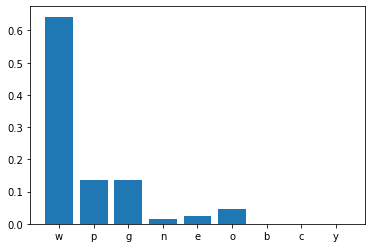

Mushroom with Laplace:


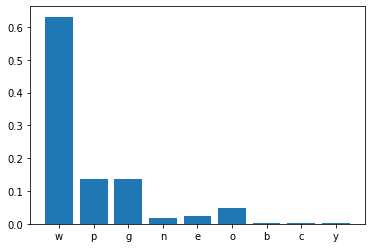

Iris: mean: 4.26 std: 0.46991097723995795


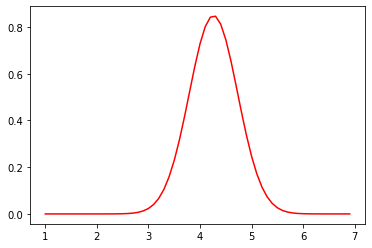

In [7]:
#8:
#re-input
x = pandas.read_csv("mushroom.csv", header=None)
y = pandas.read_csv("Iris.csv", header=None)

#mushroom without laplace
s={}
lab=x.iloc[:,0]
num_e=0
index=0
for i in x.iloc[:,15]:
    if lab[index]=='e':
        num_e+=1
        if i in s.keys():
            s[i]+=1
        else:
            s[i]=1
    index+=1
mush_x=[]
mush_y=[]
for key,value in s.items():
    mush_x.append(key)
    mush_y.append(value/num_e)
mush_x.append('b')
mush_y.append(0)
mush_x.append('c')
mush_y.append(0)
mush_x.append('y')
mush_y.append(0)
print('Mushroom without Laplace:')
plt.bar(mush_x,mush_y)
plt.show()

#mushroom with laplace
mush_y_Laplace=[]
s['b']=0
s['c']=0
s['y']=0
for i in s.values():
    mush_y_Laplace.append((i+10)/(num_e+10*9))
print('Mushroom with Laplace:')
plt.bar(mush_x,mush_y_Laplace)
plt.show()
    
#iris
iris_x=np.arange(y.iloc[:,2].min(),y.iloc[:,2].max()+0.1,0.1)
lab_i=y.iloc[:,4] #label
iris_data=[]
index=0
for i in y.iloc[:,2]:
    if lab_i[index]=='Iris-versicolor':
        iris_data.append(i)
    index+=1
mean=stat.mean(iris_data)
std=stat.stdev(iris_data)
#pdf
pdf_iris=[]
for i in iris_x:
    pdf_iris.append(scipy.stats.norm.pdf(i,mean,std))
print("Iris: mean: "+str(mean)+" std: "+str(std))
plt.plot(iris_x,pdf_iris,"r")
plt.show()